# Problem Set 5: Support Vector Machines
This assignment requires a working IPython Notebook installation.

In this problem set you will implement an SVM and fit it using quadratic programming. We will use the [CVXOPT](https://cvxopt.org/) module to solve the optimization problems. You may need to install the module if it is not included in your environment.

You may want to start with solving Problem 1 and reading the textbook, this will help a lot in the programming assignment.<br>

### Submission Guidelines

You need to submit **the output of the notebook as PDF** and **an additional .py file** on Gradescope.

For the .py file, Here are the guidelines :

1. The .py file should contain ONLY your typed codes. (Do not include any other code apart from what you coded for the assignment)

2. .py should NOT contain any written answers. Only code written by you.

3. If your typed code falls under a function definition thats predefined by us, Only include your typed code and nothing else.

4. For each cell block within colab/jupyter that you typed your code in, Add 2 new lines ("\n") before pasting your typed code in the .py file.


 The assignment is graded on completion. You will also need to **answer** whether you attempted the question or not in Gradescope. It is extremely important that you complete all assignments (both the programming and written questions), as they will prepare you for quizzes and exams.

**Total**: 100 points (+ 50 bonus points)

## Problem 1 [30 pts]

### 1.1 Dual Representations [10 pts]

In class we saw that the SVM classifier with parameters $\mathbf{w}, b$ trained on $n$ points $\{\mathbf{x}_i,y_i\}$ can be expressed in either the "primal" form

$$ h(\mathbf{x}) = sign(\mathbf{w^T x} + b )$$

or the "dual" form
$$ h(\mathbf{x}) = sign( \sum_{i=1}^{n} \alpha_i y_i \mathbf{x_i^T x}  + b)  $$

The dual form involves a "kernel function" which evaluates dot products $\mathbf{x_i^T x}$ between the input point and the training points. We can think of these values as similarities of the input $\mathbf{x}$ to the training points.

It turns out that many linear models we have seen before can be re-cast into an equivalent "dual representation" in which the predictions are also based on linear combinations of a kernel function evaluated at the training data points.

This is described in sections 6.0-6.1 in Bishop. Read it and work through all of the steps of the derivations in equations 6.2-6.9. You should understand how the derivation works in detail.

Write down in your own words: *how can the regularized least-squares regression be formulated in the dual form?*

The objective function $h(x)$ serves as a constraint that is incorporated into the dual formulation of the problem. By expressing this constraint in terms of $w$ and introducing penalty terms based on $h(x)$, I can apply the method of Lagrange multipliers. This allows me to reformulate the original minimization problem into one that includes these constraints.

$$ J =  \max_{a_{i} \geq 0} \min_{w, b}\{ \frac{1}{2}||w||^{2} + \sum_{i = 1}^{n}\alpha_{i}[1 - (w^Tx_{i} + b)y_{i}] \}$$

First, minimize the objective function $J$ for $w$ and $b$ by deriviating to the each form and setting it as 0. 

$$ \frac{\partial J}{\partial w} =  \frac{\partial}{\partial w} \{ \frac{1}{2}||w||^{2} + \sum_{i = 1}^{n}[\alpha_{i} - \alpha_{i}w^Tx_{i}y_{i} - \alpha_{i}by_{i}]\} $$

$$ = \frac{1}{2} \times 2 \times w + \sum_{i = 1}^{n} -\alpha_{i}x_{i}y_{i} = w + \sum_{i = 1}^{n} -\alpha_{i}x_{i}y_{i} = 0$$

$$ w = \sum_{i = 1}^{n} \alpha_{i}x_{i}y_{i}$$

Now repeat this process for $b$.

$$ \frac{\partial J}{\partial b} =  \frac{\partial}{\partial b} \{ \frac{1}{2}||w||^{2} + \sum_{i = 1}^{n}[\alpha_{i} - \alpha_{i}w^Tx_{i}y_{i} - \alpha_{i}by_{i}]\} $$

$$ =  \sum_{i = 1}^{n} - \alpha_{i}y_{i} = 0$$

$$ \sum_{i = 1}^{n} \alpha_{i}y_{i} = 0$$

Now I can plug these values back to the objective function $J$ to simplify to the dual form.

$$ \frac{1}{2}||w||^{2} + \sum_{i = 1}^{n}[\alpha_{i} - \alpha_{i}w^Tx_{i}y_{i} - \alpha_{i}by_{i}]$$


$$ \text{Plug in } w = \sum_{i = 1}^{n} \alpha_{i}x_{i}y_{i} \text{, and } \sum_{i = 1}^{n} \alpha_{i}y_{i} = 0 $$

$$ =  \frac{1}{2}(\sum_{i = 1}^{n} \alpha_{i}x_{i}y_{i})^{2} + \sum_{i = 1}^{n}[\alpha_{i} - \alpha_{i}(\sum_{i = 1}^{n} \alpha_{i}x_{i}y_{i})x_{i}y_{i} - (0)\times b]$$

$$ =  \frac{1}{2} \sum_{i = 1, j = 1}^{n} \alpha_{i} \alpha_{j} x_{i} x_{j} y_{i}y_{j} + \sum_{i = 1}^{n}\alpha_{i} - \sum_{i = 1, j = 1}^{n} \alpha_{i}\alpha_{j}x_{i}x_{j}y_{i}y_{j}$$

$$ = \sum_{i = 1}^{n}\alpha_{i} - \frac{1}{2} \sum_{i = 1, j = 1}^{n} \alpha_{i}\alpha_{j}x_{i}x_{j}y_{i}y_{j}$$

In dual form, the objective function is to get the maximum of $ L = \sum_{i = 1}^{n}\alpha_{i} - \frac{1}{2} \sum_{i = 1, j = 1}^{n} \alpha_{i}\alpha_{j}x_{i}x_{j}y_{i}y_{j}$.

In the dual form, $w = \sum_{i = 1}^{n} \alpha_{i}x_{i}y_{i}$, so the hypothesis $h(x)$ is $ sign( \sum_{i=1}^{n} \alpha_i y_i \mathbf{x_i^T x}  + b) $

### 1.2 Kernels [10 pts]

Read Section 6.2 and verify the results (6.13) and (6.14) for constructing valid kernels, i.e. prove the kernels constructed by (6.13) and (6.14) are valid.

(6.13) $k(x, x^{'}) = ck_{1}(x, x^{'})$, $c \geq 0$

To show that $k(x, x{\prime}) = c \cdot k_1(x, x{\prime})$ is a valid kernel, we use two key facts:
	1.	A valid kernel must act like an inner product in some space.
	2.	Its Gram matrix (built from kernel values between data points) must be positive semidefinite (PSD).

If $k_1(x, x{\prime})$ is already a valid kernel, then its Gram matrix $K_1$ is PSD for any set of input points.

Now, multiplying all entries in $K_1$ by a non-negative constant c gives us a new Gram matrix $K = c \cdot K_1$. For any vector $\mathbf{a}$, I compute:
$\mathbf{a}^T K \mathbf{a} = c \cdot \mathbf{a}^T K_1 \mathbf{a}$
Since $K_1$ is PSD, $\mathbf{a}^T K_1 \mathbf{a} \geq 0$, and if $c \geq 0$, the whole expression stays non-negative. So K is also PSD.

If $c \geq 0$, then $k(x, x{\prime}) = c \cdot k_1(x, x{\prime})$ is a valid kernel.

(6.14) $k(x, x^{'}) = f(x)k_{1}(x, x^{'})f(x^{'})$

$f(x)$ is a polynomial with nonnegative coefficients. If $k_1(x, x{\prime})$ is a valid kernel, it means it behaves like an inner product in some feature space and always gives us a positive semidefinite (PSD) Gram matrix for any set of input points.

Now, if we define a new function:
$k(x, x{\prime}) = f(x) \cdot k_1(x, x{\prime}) \cdot f(x{\prime})$
we are just scaling the kernel $k_1(x, x{\prime})$ by some function f(x) on both sides.

Imagine we have a matrix $K_1$ built from $k_1(x_i, x_j)$, and a diagonal matrix D whose diagonal entries are the values of $f(x_i)$. Then the new kernel matrix K can be written as:
$K = D \cdot K_1 \cdot D$

Now, when you multiply any PSD matrix $K_1$ from both sides by a diagonal matrix D, the result K is still PSD.

So, this new kernel function $k(x, x{\prime})$ still satisfies the kernel conditions, and is therefore also a valid kernel.

### 1.3 Maximum Margin Classifiers [10 pts]
Read section 7.1 and show that, if the 1 on the right hand side of the constraint (7.5) is replaced by some arbitrary constant $\gamma > 0$, the solution for maximum margin hyperplane is unchanged.

$$t_n(w^T \phi(x_n) + b) \geq 1$$

With the arbitrary constant $\gamma$, 

$$t_n(w^T \phi(x_n) + b) \geq \gamma$$

The new SVM optimization problem is $\min_{w, b} \frac{1}{2}||w|^{T}, t_n (\mathbf{w}^T \phi(x_n) + b) \geq \gamma$. We are looking for $(w, b)$ for the margin hyperplane, then sacle by $\gamma$ get a solution just like an original SVM problem.

The new $w$ and $b$ is scaled by $\gamma$, $\tilde{\mathbf{w}} = \frac{1}{\gamma} \mathbf{w}, \quad \tilde{b} = \frac{1}{\gamma} b$

Then:
$t_n (\tilde{\mathbf{w}}^T \phi(x_n) + \tilde{b}) = \frac{1}{\gamma} t_n (\mathbf{w}^T \phi(x_n) + b) \geq \frac{\gamma}{\gamma} = 1$

So $(\tilde{\mathbf{w}}, \tilde{b})$ satisfies the original constraint.

Now what about the objective to maximize is 
$\frac{1}{2} \|\tilde{\mathbf{w}}\|^2 = \frac{1}{2} \left\| \frac{1}{\gamma} \mathbf{w} \right\|^2 = \frac{1}{\gamma^2} \cdot \frac{1}{2} \|\mathbf{w}\|^2$

The margin hyperplane is $$\frac{t_n(w^T \phi(x_n) + b)}{||w||} = \frac{\gamma t_n(w^T \phi(x_n) + b)}{||\frac{1}{\gamma}W||}$$
 
So, you’ve essentially scaled both the margin and the objective, but the direction of the hyperplane stays the same. And in SVMs, the orientation of the hyperplane (its normal vector) is what matters, not its scale.

## Problem 2: Quadratic Programming [10 points]






The standard form of a Quadratic Program (QP) can be formulated as
$$
\begin{align}
\min_x\quad &\frac{1}{2} x^TPx + q^Tx\\
\text{subject to }\quad & Gx \preceq h\\
& Ax = b
\end{align}
$$

where $\preceq$ is an element-wise $\leq$.
The CVXOPT solver finds an optimal solution $x^*$, given a set of matrices $P, q, G, h, A, b$.

FYI, you can read about the methods for solving quadratic programming problems [here](https://en.wikipedia.org/wiki/Quadratic_programming#Solution_methods) (optional).

Design appropriate matrices to solve the following QP problem:

$$
\begin{align}
\min_x\quad &f(x)=x_1^2 + 4x_2^2-8x_1-16x_2\\
\text{subject to }\quad & x_1+x_2\leq 5\\
& x_1 \leq 3\\
& x_2 \geq 0
\end{align}
$$

*Hint: first notice that if $x = [x_1, x_2]^T$ and P is a matrix*
\begin{vmatrix}
p_{11} & p_{12} \\
p_{21} & p_{22}
\end{vmatrix}

then $x^T P x = p_{11} x_1^2  + (p_{12} + p_{21}) x_1x_2 +  p_{22} x_2^2. $

We have filled in the correct $P$ below.

**Note**: you may find the following video explaining quadratic programming useful: https://www.youtube.com/watch?v=GZb9647X8sg

In [1]:
from cvxopt import matrix, solvers
# Turns off the printing of CVXOPT solution for the rest of the notebook
solvers.options['show_progress'] = False

P = 2 * matrix([[1., 0.], [0., 4.]])
#------------------------------------------------------------------------------------------
# Define q, G, h
q = matrix([-8., -16.])
G = matrix([[1., 1., 0.], [1., 0., -1.]])
h = matrix([5., 3., 0.])
#------------------------------------------------------------------------------------------

sol = solvers.qp(P, q, G, h)
x1, x2 = sol['x']
print('Optimal x: ({:.8f}, {:.8f})'.format(x1, x2))

Optimal x: (2.99999993, 1.99927914)


Let's visualize the solution

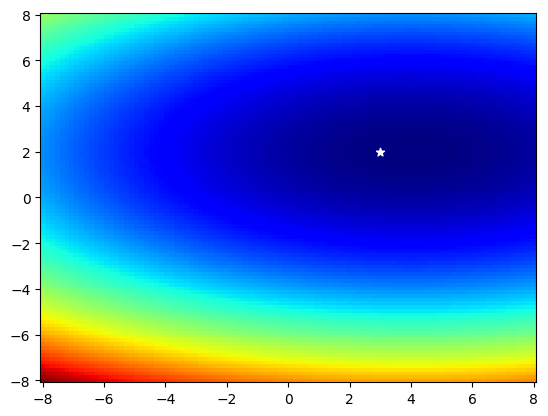

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

X1, X2 = np.meshgrid(np.linspace(-8, 8, 100), np.linspace(-8, 8, 100))
F = X1**2 + 4*X2**2 - 8*X1 - 16 * X2

plt.pcolor(X1, X2, F, cmap='jet', shading="auto")
plt.scatter([x1], [x2], marker='*', color='white')
plt.show()

Why is the solution not in the minimum?

**Answer**: Beacuse each variables $x_{1}$ and $x_{2}$ have three constraints. Which moved the solution from the global minimum. The solution is trying to find the minimum values with satisfing all the constraints.

## Problem 3: Implementing Linear SVM [60 points]

Now, let's implement linear SVM. We will do this for the general case that allows class distributions to overlap, i.e. the linearly non-separable case **(see Bishop 7.1.1)**.

As a linear model, linear SVM produces classification scores for a given sample $x$ as

$$
 \hat y(x) = w^T\phi(x) + b
$$

where $w\in\mathbb{R}^d$, $b\in\mathbb{R}$ are model weights and bias, respectively, and $\phi$ is a fixed feature-space transformation. Final label prediction is done by taking the sign of $\hat y(x)$.

Given a set of training samples $x_n\in\mathbb{R}^d$, $n\in 1,\ldots, N$, with the corresponding labels $y_i\in\{-1, 1\}$ linear SVM is fit (*i.e.* parameters $w$ and $b$ are chosen) by solving the following constrained optimization task:
$$
\begin{align}
    \min_{w, \xi, b}\quad & \frac{1}{2}||w||^2 + C\sum_{n=1}^N \xi_n\\
    \text{subject to }\quad & y_n\hat y(x_n) \geq 1 - \xi_n, & n=1,\ldots, N\\
    & \xi_n \geq 0, & n=1,\ldots, N
\end{align}
$$

Note that the above is a quadratic programming problem.

## Problem 3.1 [50 points]
Your task is to implement the linear SVM above using a QP solver by designing appropriate matrices $P$, $q$, $G$, $h$. Complete the code below.

**Note**, some of the code in cells below will take minutes to run, so feel free to test you code on smaller tasks while you go. Easiest way would be to remove  for-loops and run the code just once.

##### Hints
1. You need to optimize over $w, \xi, b$. You can simply concatenate them into $\chi = (w, \xi, b)$ to feed it into QP-solver. Now, how to define the objective function and the constraints in terms of $\chi$? (For example, $b_1 + b_2$ can be obtained from vector $(a_1, b_1, b_2, c_1, c_2)$ by taking the inner product with $(0, 1, 1, 0, 0)$).
3. You can use `np.bmat` to construct matrices. Like this:

In [3]:
np.bmat([[np.identity(3), np.zeros((3, 1))],
         [np.zeros((2, 3)), -np.ones((2, 1))]])

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  0.],
        [ 0.,  0.,  0., -1.],
        [ 0.,  0.,  0., -1.]])

In [21]:
from sklearn.base import BaseEstimator

class LinearSVM(BaseEstimator):
    def __init__(self, C, transform=None):
        self.C = C
        self.transform = transform

    def fit(self, X, Y):
        """Fit Linear SVM using training dataset (X, Y).

        :param X: data samples of shape (N, d).
        :param Y: data target labels of size (N). Each label is either 1 or -1.
        """
        # Apply transformation (phi) to X
        if self.transform is not None:
            X = self.transform(X)
        d = len(X[0])
        N = len(X)

        #------------------------------------------------------------------------------------------
        # Construct appropriate matrices here to solve the optimization problem described above.
        # We want optimal solution for vector (w, xi, b).
        p = np.bmat([[np.identity(d), np.zeros((d, N + 1))],
                     [np.zeros((N, d + N + 1))], 
                     [np.zeros((1, d + N + 1))]])
        P = matrix(p)
        
        # q = np.bmat([[np.zeros((1, d)), np.full((1, N), self.C), np.zeros((1,1))]])
        q = np.vstack([
                np.zeros((d, 1)),
                np.full((N, 1), self.C),
                np.zeros((1, 1))
            ])
        q = matrix(q)
        
        
        g = np.bmat([[-Y[:, None] * X, -np.eye(N), -Y[:, None]],
                     [np.zeros((N, d)), -np.eye(N), np.zeros((N,1))]])
        
        G = matrix(g)
        
        h = matrix(np.bmat([[-np.ones((N, 1))], [np.zeros((N,1))]]))
        # h = matrix([-np.ones(N), np.zeros(N)])
        #------------------------------------------------------------------------------------------

        sol = solvers.qp(P, q, G, h)
        ans = np.array(sol['x']).flatten()
        self.weights_ = ans[:d]
        self.xi_ = ans[d:d+N]
        self.bias_ = ans[-1]

        #------------------------------------------------------------------------------------------
        # Find support vectors. Must be a boolean array of length N having True for support
        # vectors and False for the rest.
        margins = Y * self.predict_proba(X)
        eps = 1e-4
        self.support_vectors = (np.abs(margins - 1) < eps) | (self.xi_ > eps)
        #------------------------------------------------------------------------------------------

    def predict_proba(self, X):
        """
        Make real-valued prediction for some new data.
        :param X: data samples of shape (N, d).
        :return: an array of N predicted scores.
        """
        if self.transform is not None:
            X = self.transform(X)
        y_hat = X @ self.weights_ + self.bias_
        return y_hat


    def predict(self, X):
        """
        Make binary prediction for some new data.
        :param X: data samples of shape (N, d).
        :return: an array of N binary predicted labels from {-1, 1}.
        """
        return np.sign(self.predict_proba(X))

Let's see how our LinearSVM performs on some data.

In [4]:
from sklearn.datasets import make_classification, make_circles
X = [None, None, None]
y = [None, None, None]
X[0], y[0] = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=1)
X[1], y[1] = make_circles(n_samples=100, factor=0.5)
X[2], y[2] = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# Go from {0, 1} to {-1, 1}
y = [2 * yy - 1 for yy in y]

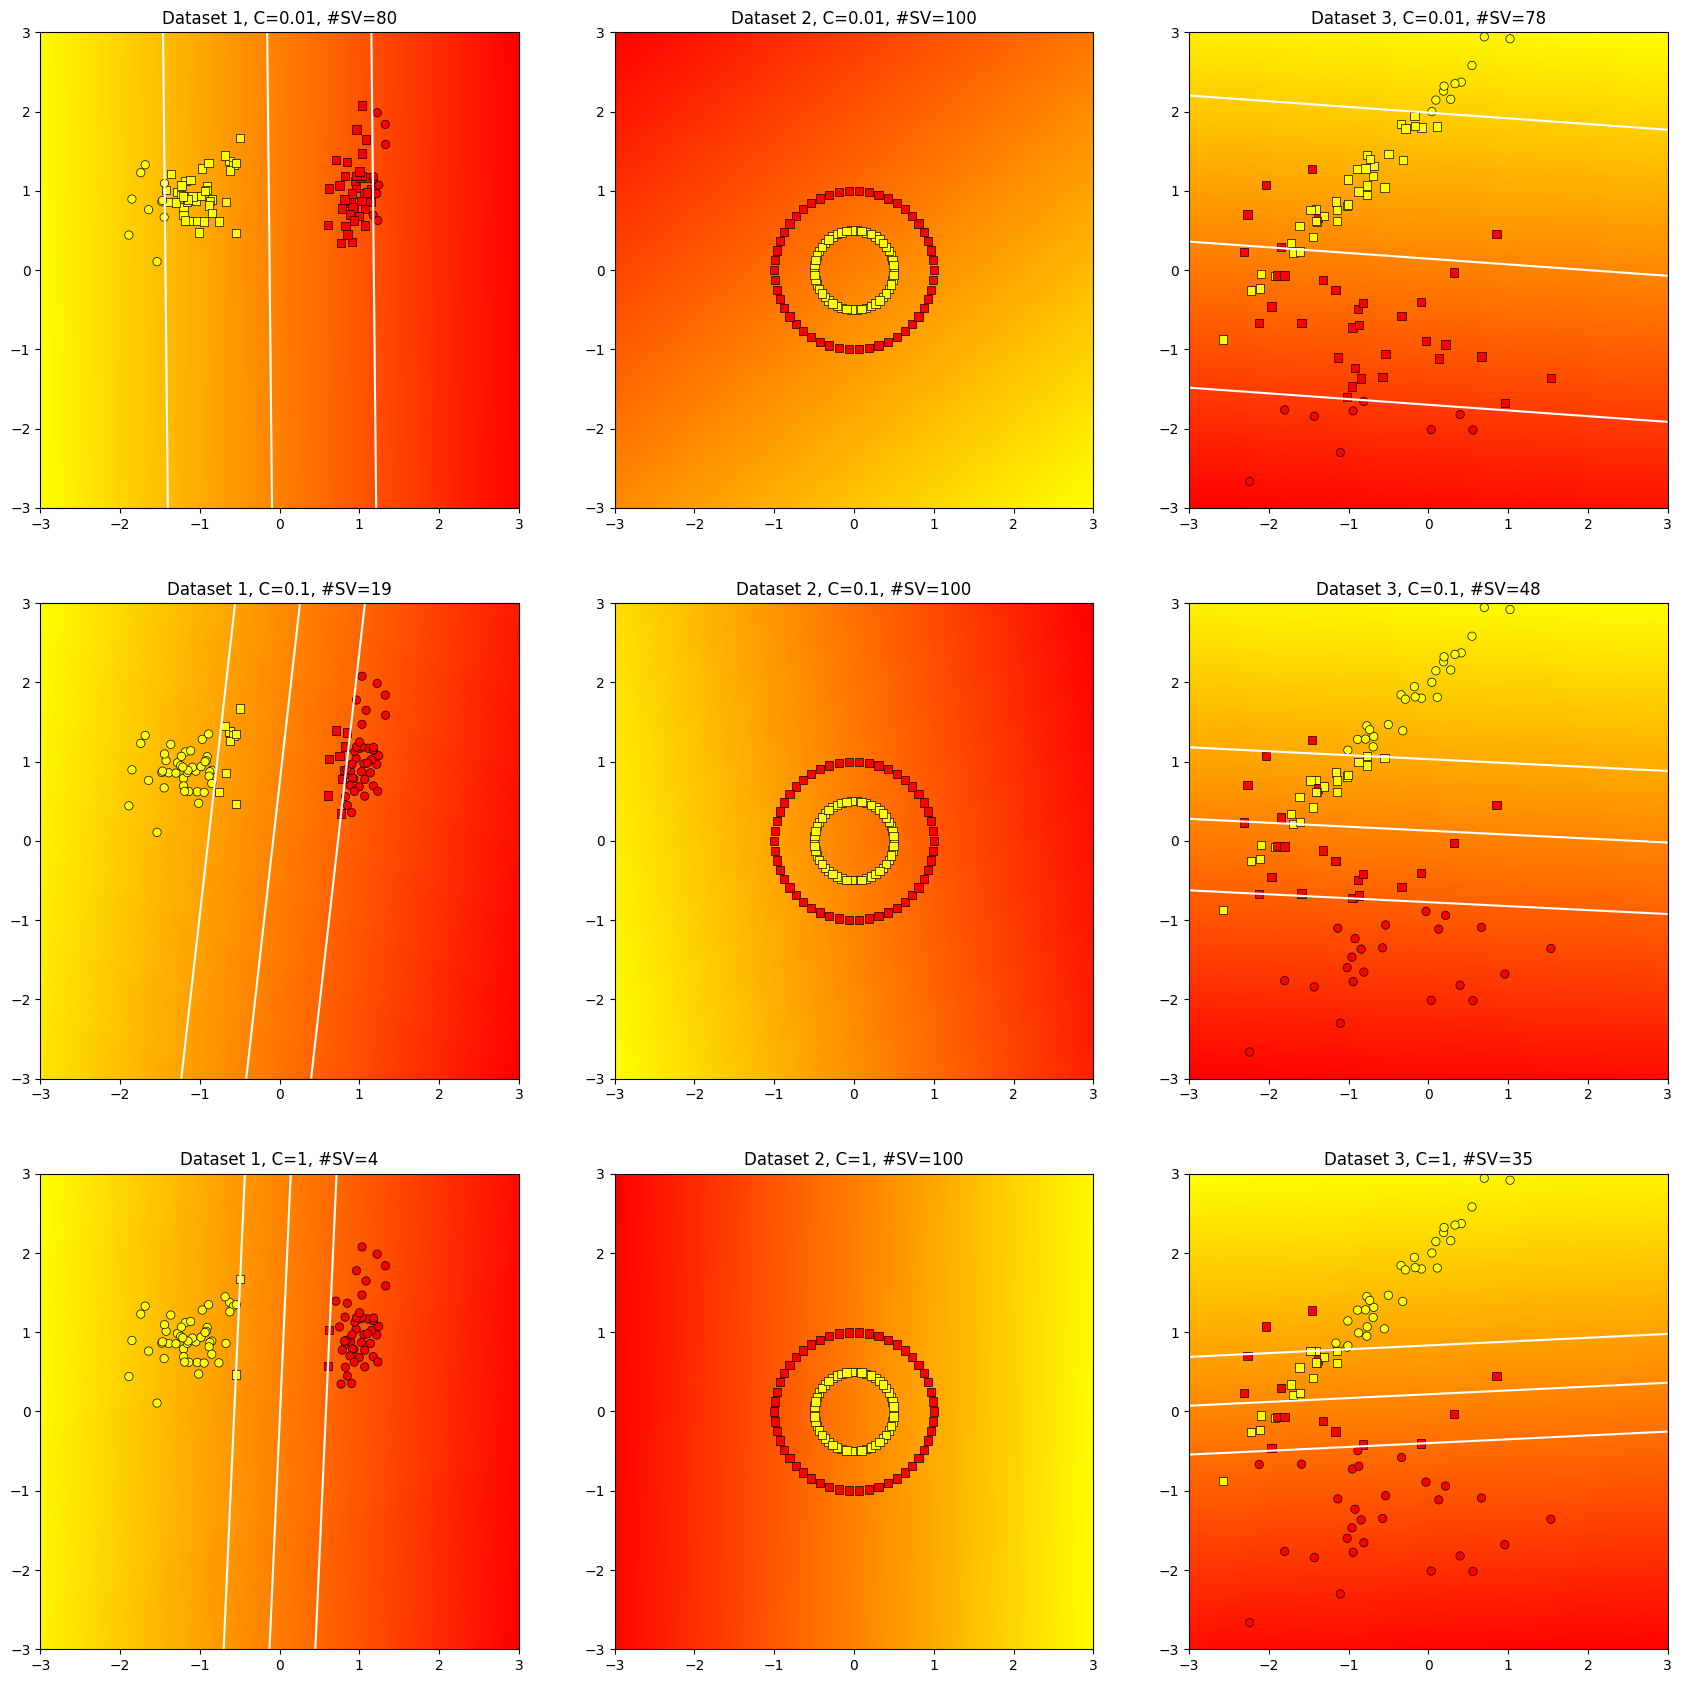

In [22]:
C_values = [0.01, 0.1, 1]

plot_i = 0
plt.figure(figsize=(len(X) * 7, len(C_values) * 7))
for C in C_values:
    for i in range(len(X)):
        plot_i += 1
        plt.subplot(len(C_values), len(X), plot_i)
        #----------------------------------------------------------------------------
        model = LinearSVM(C=C)
        #----------------------------------------------------------------------------
        model.fit(X[i], y[i])
        sv = model.support_vectors
        n_sv = sv.sum()
        if n_sv > 0:
            plt.scatter(X[i][:, 0][sv], X[i][:, 1][sv], c=y[i][sv], cmap='autumn', marker='s',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        if n_sv < len(X[i]):
            plt.scatter(X[i][:, 0][~sv], X[i][:, 1][~sv], c=y[i][~sv], cmap='autumn',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        xvals = np.linspace(-3, 3, 200)
        yvals = np.linspace(-3, 3, 200)
        xx, yy = np.meshgrid(xvals, yvals)
        zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()]), xx.shape)
        plt.pcolormesh(xx, yy, zz, cmap='autumn', zorder=0, shading="auto")
        plt.contour(xx, yy, zz, levels=(-1, 0, 1,), colors='w', linewidths=1.5, zorder=1, linestyles='solid')

        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        plt.title('Dataset {}, C={}, #SV={}'.format(i + 1, C, n_sv))
plt.show()

Why does the number of support vectors decrease as $C$ increases?

For debug purposes: the very last model must have almost the same weights and bias as:

$$w = \begin{pmatrix}-0.0784521\\ 1.62264867\end{pmatrix}$$
$$b = -0.3528510092782581$$

In [23]:
model.weights_

array([-0.0784521 ,  1.62264867])

In [24]:
model.bias_

np.float64(-0.35285100927825813)

## Problem 3.2 [10 points]

Even using a linear SVM, we are able to separate data that is linearly inseparable by using feature transformations.

Implement the following feature transformation
$
    \phi(x_1, x_2) = (x_1,\ x_2,\ x_1^2,\ x_2^2,\ x_1x_2)
$
and re-run your SVM.

In [25]:
def append_second_order(X):
    """Given array Nx[x1, x2] return Nx[x1, x2, x1^2, x2^2, x1x2]."""
    x1, x2 = X[:, 0], X[:, 1]
    
    new_X = np.column_stack([
        x1, x2, x1**2, x2**2, x1*x2
    ])
    return new_X

assert np.all(append_second_order(np.array([[1, 2]])) == np.array([[1, 2, 1, 4, 2]])), 'Transformation is incorrect.'

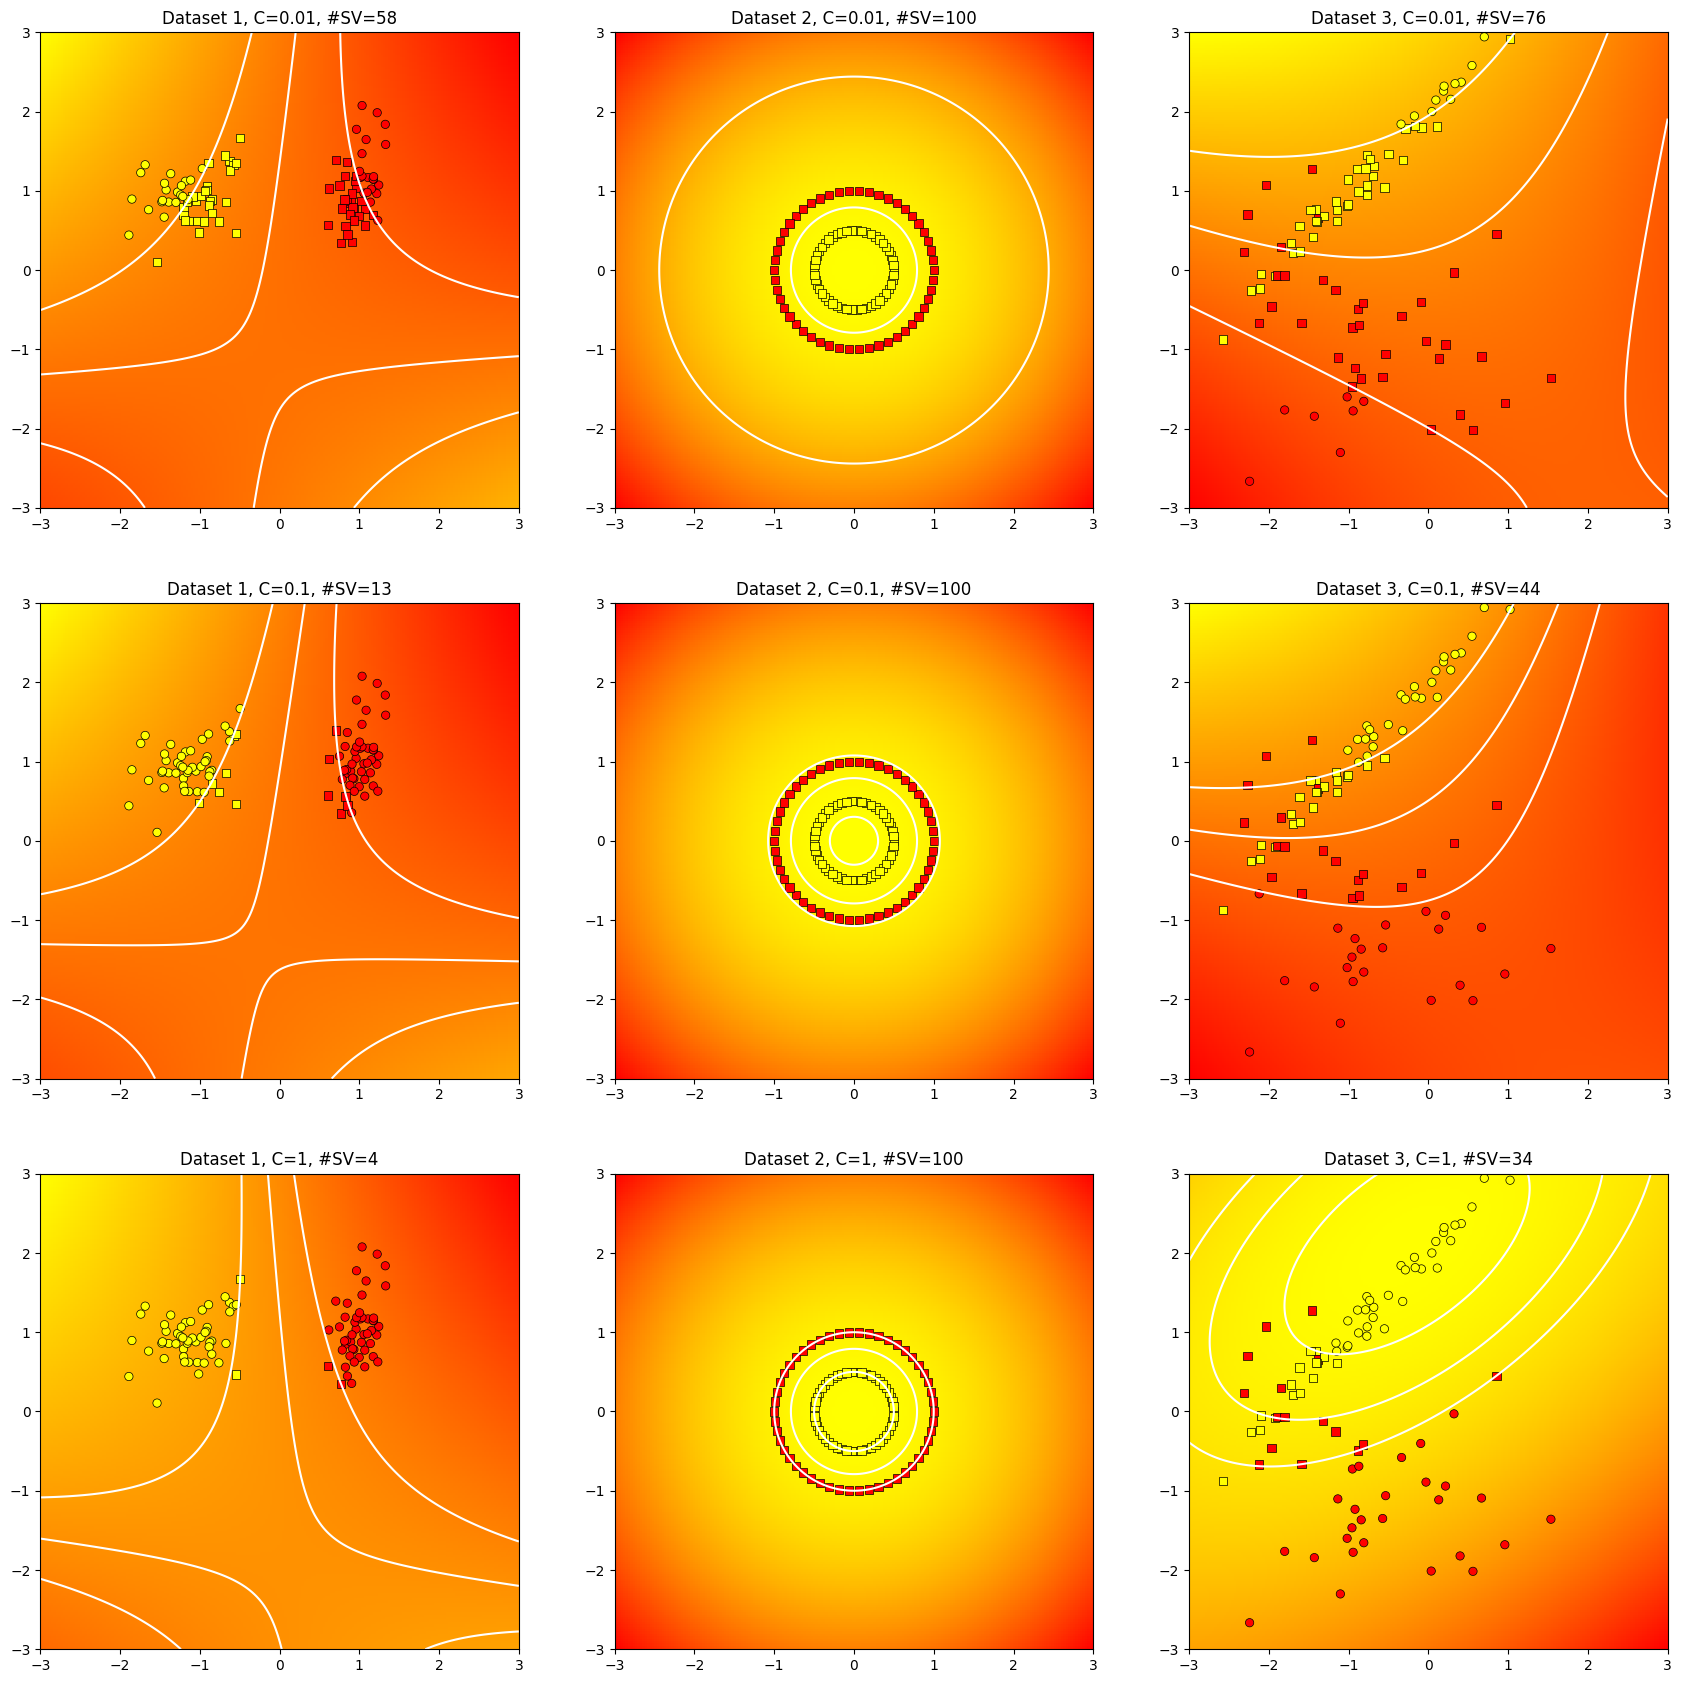

In [26]:
plot_i = 0
C_values = [0.01, 0.1, 1]
plt.figure(figsize=(len(X) * 7, len(C_values) * 7))
for C in C_values:
    for i in range(len(X)):
        plot_i += 1
        plt.subplot(len(C_values), len(X), plot_i)
        #----------------------------------------------------------------------------
        model = LinearSVM(C=C, transform=append_second_order)
        #----------------------------------------------------------------------------
        model.fit(X[i], y[i])
        sv = model.support_vectors
        n_sv = sv.sum()
        if n_sv > 0:
            plt.scatter(X[i][:, 0][sv], X[i][:, 1][sv], c=y[i][sv], cmap='autumn', marker='s',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        if n_sv < len(X[i]):
            plt.scatter(X[i][:, 0][~sv], X[i][:, 1][~sv], c=y[i][~sv], cmap='autumn',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        xvals = np.linspace(-3, 3, 200)
        yvals = np.linspace(-3, 3, 200)
        xx, yy = np.meshgrid(xvals, yvals)
        zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()]), xx.shape)
        plt.pcolormesh(xx, yy, zz, cmap='autumn', zorder=0, shading="auto")
        plt.contour(xx, yy, zz, levels=(-1, 0, 1,), colors='w', linewidths=1.5, zorder=1, linestyles='solid')

        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        plt.title('Dataset {}, C={}, #SV={}'.format(i + 1, C, n_sv))
plt.show()

# Bonus part (Optional)

## Problem 4: Dual representation. Kernel SVM [50 points]

The dual representation of the maximum margin problem is given by

\begin{align}
    \max_{\alpha}\quad & \sum_{n=1}^N\alpha_n - \frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N\alpha_n\alpha_my_ny_mk(x_n, x_m)\\
    \text{subject to }\quad & 0 \leq \alpha_n \leq C,\quad n=1,\ldots, N\\
    & \sum_{n=1}^N\alpha_ny_n = 0
\end{align}

In this case bias $b$ can be computed as
$b = \frac{1}{|\mathcal{S}|}\sum_{n\in \mathcal{S}}\left(y_n - \sum_{m\in \mathcal{S}}\alpha_my_mk(x_n, x_m)\right),$
and the prediction turns into
$\hat{y}(x) = \sum_{n\in \mathcal{S}}\alpha_ny_nk(x_n, x) + b.$

Everywhere above $k$ is a kernel function: $k(x_1, x_2)=\phi(x_1)^T\phi(x_2)$ (and the trick is that we don't have to specify $\phi$, just $k$).

Note, that now
1. We want to maximize the objective function, not minimize it.
2. We have equality constraints. (That means we should use $A$ and $b$ in qp-solver)
3. We need access to the support vectors (but not all the training samples) in order to make a prediction.

## Problem 4.1 [40 points]
Implement KernelSVM

##### Hints
1. What is the variable we are optimizing over?
2. How can we maximize a function given a tool for minimization?
3. What is the definition of a support vector in the dual representation?

In [ ]:
class KernelSVM(BaseEstimator):
    def __init__(self, C, kernel=np.dot):
        self.C = C
        self.kernel = kernel

    def fit(self, X, Y):
        """Fit Kernel SVM using training dataset (X, Y).

        :param X: data samples of shape (N, d).
        :param Y: data target labels of size (N). Each label is either 1 or -1. Denoted as t_i in Bishop.
        """
        N = len(Y)

        # The Unknown values that I am looking for is "Alpha"
        #------------------------------------------------------------------------------------------
        # Construct appropriate matrices here to solve the optimization problem described above.
        P = 
        q =
        G =
        h =
        A =
        b =
        #------------------------------------------------------------------------------------------

        sol = solvers.qp(P, q, G, h, A, b)
        self.alpha_ = np.array(sol['x']).flatten()

        #------------------------------------------------------------------------------------------
        # Find support vectors. Must be a boolean array of length N having True for support
        # vectors and False for the rest.
        self.support_vectors =
        #------------------------------------------------------------------------------------------

        sv_ind = self.support_vectors.nonzero()[0]
        self.X_sup = X[sv_ind]
        self.Y_sup = Y[sv_ind]
        self.alpha_sup = self.alpha_[sv_ind]
        self.n_sv = len(sv_ind)

        #------------------------------------------------------------------------------------------
        # Compute bias
        self.bias_ =
        #------------------------------------------------------------------------------------------

    def predict_proba(self, X):
        """
        Make real-valued prediction for some new data.
        :param X: data samples of shape (N, d).
        :return: an array of N predicted scores.
        """
        return y_hat

    def predict(self, X):
        """
        Make binary prediction for some new data.
        :param X: data samples of shape (N, d).
        :return: an array of N binary predicted labels from {-1, 1}.
        """
        return np.sign(self.predict_proba(X))

We can first test our implementation by using the dot product as a kernel function. What should we expect in this case?

In [ ]:
C = 1
i = 0

plt.figure(figsize=(7, 7))
#----------------------------------------------------------------------------
model = KernelSVM(C=C, kernel=np.dot)
#----------------------------------------------------------------------------
model.fit(X[i], y[i])
sv = model.support_vectors
n_sv = sv.sum()
if n_sv > 0:
    plt.scatter(X[i][:, 0][sv], X[i][:, 1][sv], c=y[i][sv], cmap='autumn', marker='s',
                linewidths=0.5, edgecolors=(0, 0, 0, 1))
if n_sv < len(X[i]):
    plt.scatter(X[i][:, 0][~sv], X[i][:, 1][~sv], c=y[i][~sv], cmap='autumn',
                linewidths=0.5, edgecolors=(0, 0, 0, 1))
xvals = np.linspace(-3, 3, 200)
yvals = np.linspace(-3, 3, 200)
xx, yy = np.meshgrid(xvals, yvals)
zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()]), xx.shape)
plt.pcolormesh(xx, yy, zz, cmap='autumn', zorder=0, shading="auto")
plt.contour(xx, yy, zz, levels=(-1, 0, 1,), colors='w', linewidths=1.5, zorder=1, linestyles='solid')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.title('Dataset {}, C={}, #SV={}'.format(i + 1, C, n_sv))
plt.show()

## Problem 4.2 [5 points]
Implement a polynomial kernel function ([wiki](https://en.wikipedia.org/wiki/Polynomial_kernel)).

In [ ]:
def polynomial_kernel(d, c=0):
    """Returns a polynomial kernel FUNCTION."""
    def kernel(x, y):
        """
        :param x: vector of size L
        :param y: vector of size L
        :return: [polynomial kernel of degree d with bias parameter c] of x and y. A scalar.
        """
        pass
    return kernel

assert polynomial_kernel(d=2, c=1)(np.array([1, 2]), np.array([3, 4])) == 144, 'Polynomial kernel implemented incorrectly'

Let's see how it performs. This might take some time to run.

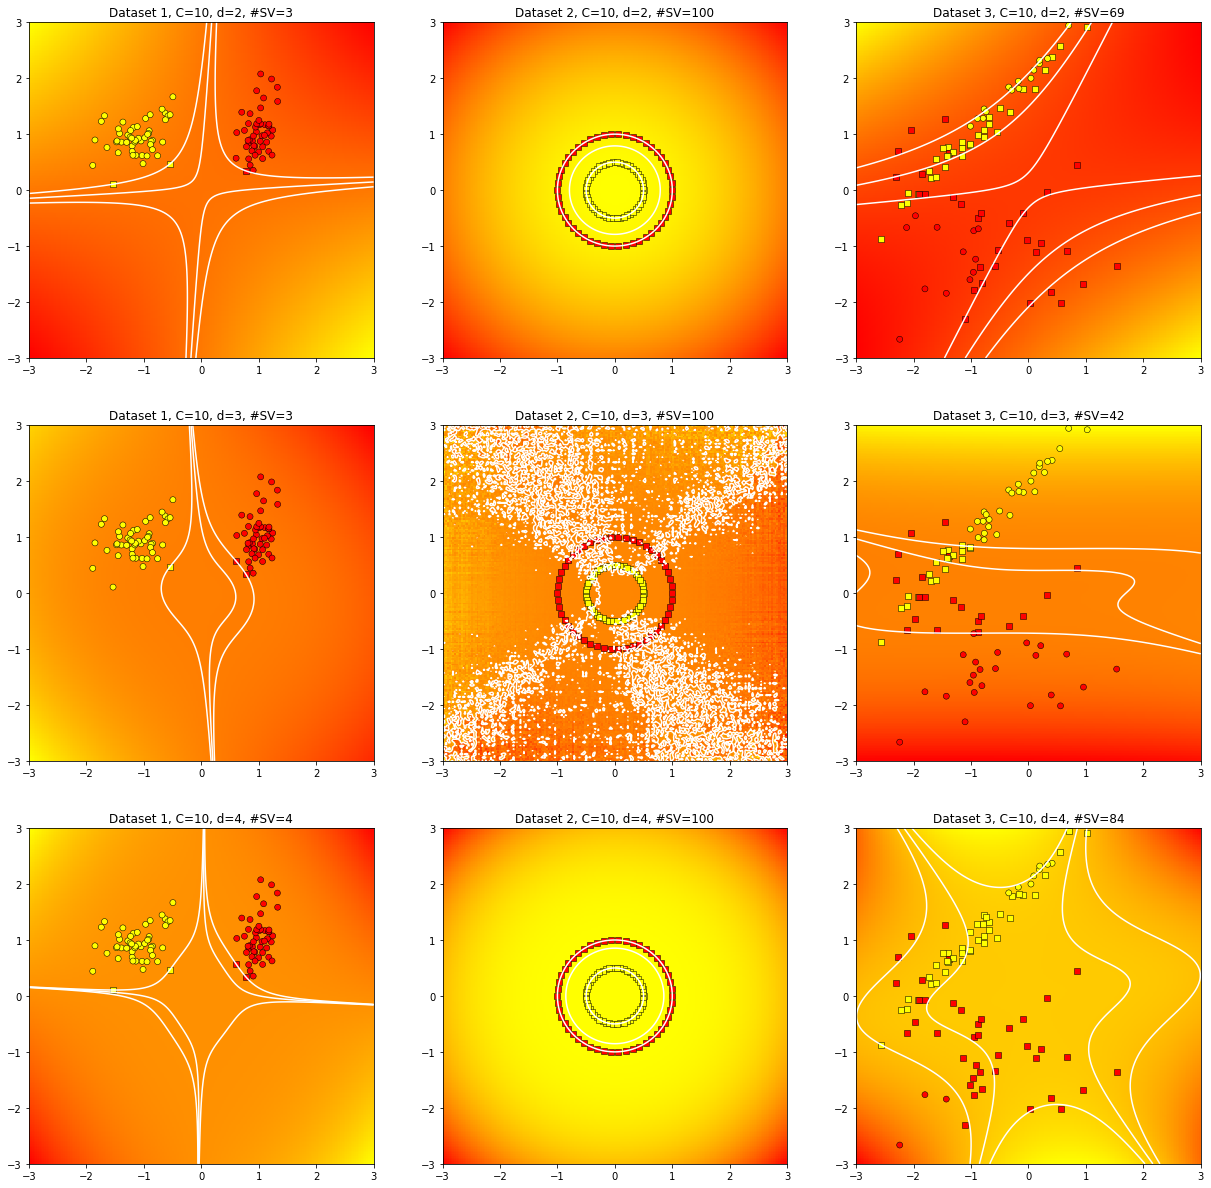

In [ ]:
plot_i = 0
C = 10
d_values = [2, 3, 4]
plt.figure(figsize=(len(X) * 7, len(d_values) * 7))
for d in d_values:
    for i in range(len(X)):
        plot_i += 1
        plt.subplot(len(d_values), len(X), plot_i)
        #----------------------------------------------------------------------------
        model = KernelSVM(C=C, kernel=polynomial_kernel(d))
        #----------------------------------------------------------------------------
        model.fit(X[i], y[i])
        sv = model.support_vectors
        n_sv = sv.sum()
        if n_sv > 0:
            plt.scatter(X[i][:, 0][sv], X[i][:, 1][sv], c=y[i][sv], cmap='autumn', marker='s',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        if n_sv < len(X[i]):
            plt.scatter(X[i][:, 0][~sv], X[i][:, 1][~sv], c=y[i][~sv], cmap='autumn',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        xvals = np.linspace(-3, 3, 200)
        yvals = np.linspace(-3, 3, 200)
        xx, yy = np.meshgrid(xvals, yvals)
        zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()]), xx.shape)
        plt.pcolormesh(xx, yy, zz, cmap='autumn', zorder=0, shading="auto")
        plt.contour(xx, yy, zz, levels=(-1, 0, 1,), colors='w', linewidths=1.5, zorder=1, linestyles='solid')

        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        plt.title('Dataset {}, C={}, d={}, #SV={}'.format(i + 1, C, d, n_sv))

## Problem 4.3 [5 points]
Finally, you need to implement a **radial basis function** kernel ([wiki](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)).

In [ ]:
def RBF_kernel(sigma):
    """Returns an RBF kernel FUNCTION."""
    def kernel(x, y):
        """
        :param x: vector of size L
        :param y: vector of size L
        :return: [rbf kernel with parameter sigma] of x and y. A scalar.
        """
        pass
    return kernel

Let's see how it performs. This might take some time to run.

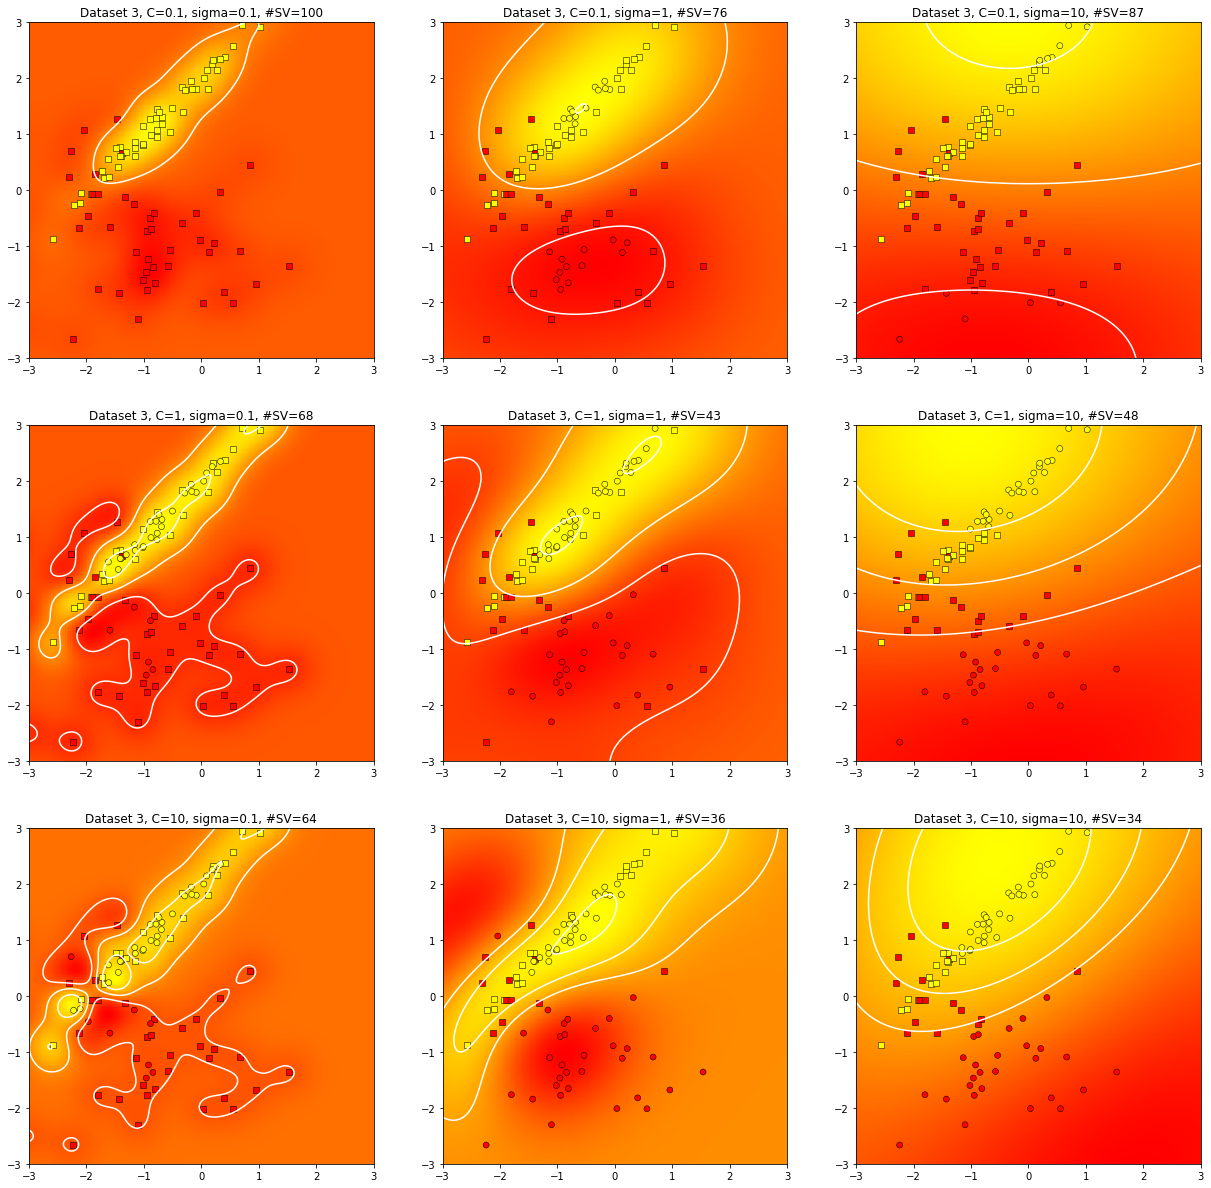

In [ ]:
plot_i = 0
C_values = [0.1, 1, 10]
sigma_values = [0.1, 1, 10]
plt.figure(figsize=(len(sigma_values) * 7, len(C_values) * 7))
i = 2
for C in C_values:
    for sigma in sigma_values:
        plot_i += 1
        plt.subplot(len(C_values), len(X), plot_i)
        model = KernelSVM(C=C, kernel=RBF_kernel(sigma))
        model.fit(X[i], y[i])
        sv = model.support_vectors
        n_sv = sv.sum()
        if n_sv > 0:
            plt.scatter(X[i][:, 0][sv], X[i][:, 1][sv], c=y[i][sv], cmap='autumn', marker='s',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        if n_sv < len(X[i]):
            plt.scatter(X[i][:, 0][~sv], X[i][:, 1][~sv], c=y[i][~sv], cmap='autumn',
                        linewidths=0.5, edgecolors=(0, 0, 0, 1))
        xvals = np.linspace(-3, 3, 200)
        yvals = np.linspace(-3, 3, 200)
        xx, yy = np.meshgrid(xvals, yvals)
        zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()]), xx.shape)
        plt.pcolormesh(xx, yy, zz, cmap='autumn', zorder=0, shading="auto")
        plt.contour(xx, yy, zz, levels=(-1, 0, 1,), colors='w', linewidths=1.5, zorder=1, linestyles='solid')

        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        plt.title('Dataset {}, C={}, sigma={}, #SV={}'.format(i + 1, C, sigma, n_sv))

## Well done!

Awesome! Now you understand all of the important parameters in SVMs. Have a look at SVM from scikit-learn module and how it is used (very similar to ours).

In [ ]:
from sklearn.svm import SVC
SVC?

Init signature: SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time complexity
is more than quadratic with the number of samples which makes it hard
to scale to dataset with more than a couple of 10000 samples.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrative documentation:
:ref:`svm_kernels`.

Read more in the :ref:`User Guide <svm_classification>`.

Parameters
----------
C : float, optional (default=1.0)
    Penalty parameter C of the error term.

kernel : string, optional (default='rbf')
    Specifies 

C:\miniconda\envs\cvx\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


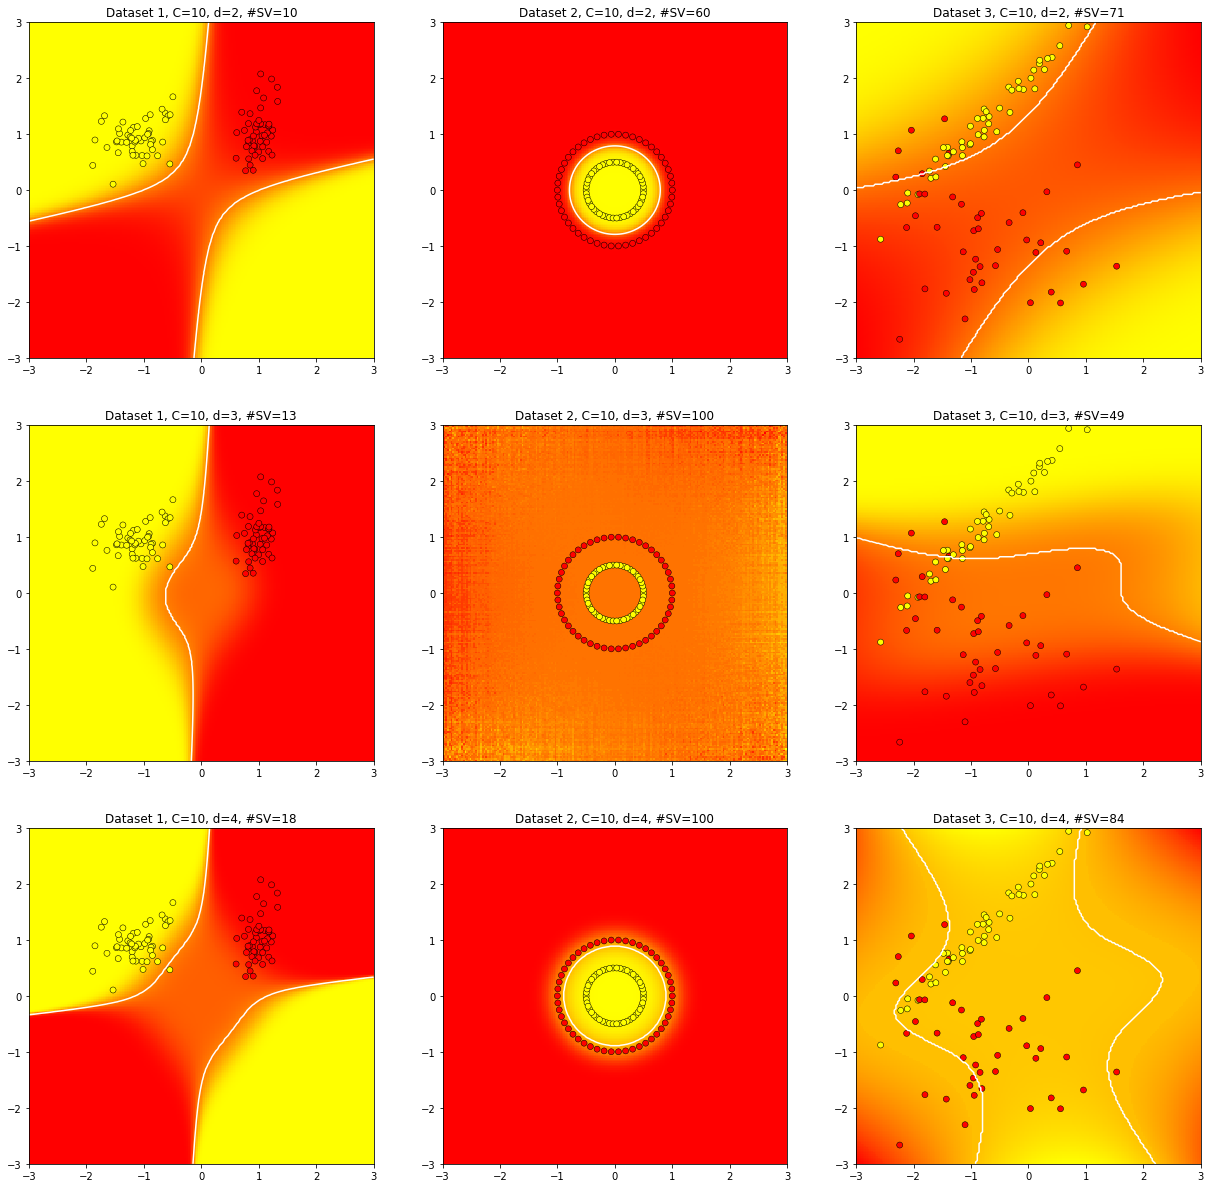

In [ ]:
plot_i = 0
C = 10
d_values = [2, 3, 4]
plt.figure(figsize=(len(X) * 7, len(d_values) * 7))
for d in d_values:
    for i in range(len(X)):
        plot_i += 1
        plt.subplot(len(d_values), len(X), plot_i)
        #----------------------------------------------------------------------------
        model = SVC(kernel='poly', degree=d, gamma='auto', probability=True)
        #----------------------------------------------------------------------------
        model.fit(X[i], y[i])
        plt.scatter(X[i][:, 0], X[i][:, 1], c=y[i], cmap='autumn', linewidths=0.5, edgecolors=(0, 0, 0, 1))
        xvals = np.linspace(-3, 3, 200)
        yvals = np.linspace(-3, 3, 200)
        xx, yy = np.meshgrid(xvals, yvals)
        zz = np.reshape(model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] * 2 - 1, xx.shape)
        plt.pcolormesh(xx, yy, zz, cmap='autumn', zorder=0, shading="auto")
        plt.contour(xx, yy, zz, levels=(-1., 0., 1.), colors='w', linewidths=1.5, zorder=1, linestyles='solid')

        plt.xlim([-3, 3])
        plt.ylim([-3, 3])
        plt.title('Dataset {}, C={}, d={}, #SV={}'.format(i + 1, C, d, len(model.support_vectors_)))